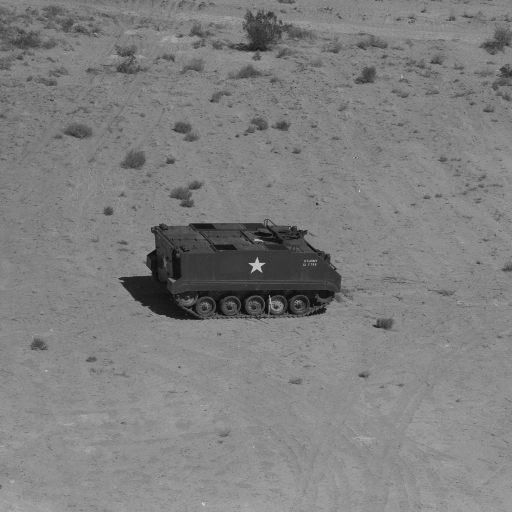

total blob are : 569 


In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# load an color image
img = cv2.imread('apc.tiff',0)
(row,col)=img.shape
def thresholding(img):
    threshold=95
    th_img=np.zeros((row,col,1), np.uint8)
    for i in range(row):
        for j in range(col):
            if img[i][j]>=threshold:
                th_img[i][j]=0
            else:
                th_img[i][j]=255
    return th_img

def connected_component(th_img):
    R = np.zeros((row+1,col+1,1), np.uint8)
    mbr=np.zeros((row+1,col+1,1), np.uint8)
    t_img= cv2.copyMakeBorder(th_img,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
    k=1
    
    for i in range(1,row+1):
        for j in range(1,col+1):
            if t_img[i][j] == 0 and t_img[i][j-1] == 255 and t_img[i-1][j] == 255:
                R[i][j] = k
                k+=1
            elif t_img[i][j] == 0 and t_img[i][j-1] == 255 and t_img[i-1][j] == 0:
                R[i][j] = R[i-1][j]
            elif t_img[i][j] == 0 and t_img[i][j-1] == 0 and t_img[i-1][j] == 255:
                R[i][j] = R[i][j-1]
            elif t_img[i][j] == 0 and t_img[i][j-1] == 0 and t_img[i-1][j] == 0:
                R[i][j] = R[i-1][j]
            elif t_img[i][j] != t_img[i-1][j]:
                R[i][j-1] = R[i-1][j]
      
    return k


def main():
    th_img=thresholding(img)
    cv2_imshow(img)
    rest=connected_component(th_img)
    print ("total blob are : %d " % rest)
       
main()

